# Exercise 1
AdaBoost on a uni-dimensional array

Given the dataset below and the AdaBoost algorithm using the usual decision stumps as weak learners:

1. Plot the dataset using `pyplot`.
2. Draw the decision surface corresponding to the first weak learner.
3. What are the values of $\epsilon_1$ (training error of the first decision stump) and $\alpha_1$ (the "weight" of the vode of the first decision stump)?
4. What will be the updated weights of the training instances, after the first update?
5. Draw the decision surface after adding the second weak learner.

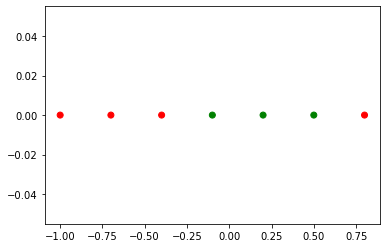

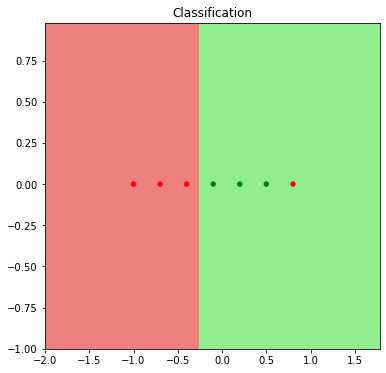

Training error: 0.1428571428571429
[1. 0.]


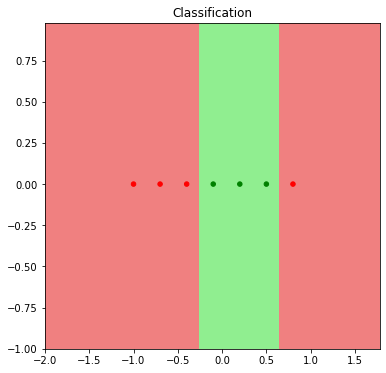

Training error: 0.0
[1. 0.]


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tools.plots import plot_decision_surface
from sklearn.ensemble import AdaBoostClassifier

d = pd.DataFrame({
    'X1': [-1, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8],
    'X2': [0, 0, 0, 0, 0, 0, 0],
    'Y': [1, 1, 1, -1, -1, -1, 1]
})
X, Y = d[['X1', 'X2']], d['Y']
c = ["green" if label == -1 else "red" for label in Y]

plt.scatter(X["X1"], X["X2"], color=c)
plt.show()

ab = AdaBoostClassifier(n_estimators=1).fit(X, Y)
plot_decision_surface(ab, X, Y)

print("Training error:", 1-ab.score(X, Y))

print(ab.feature_importances_)

ab = AdaBoostClassifier(n_estimators=2).fit(X, Y)
plot_decision_surface(ab, X, Y)

print("Training error:", 1-ab.score(X, Y))

print(ab.feature_importances_)

# Exercise 2
AdaBoost on a two-dimensional array

Given the dataset below and the AdaBoost algorithm using the usual decision stumps as weak learners:
1. Plot the dataset using `pyplot`.
2. Draw the decision surface corresponding to the first weak learner as chosen by `AdaBoostClassifier` with the default `base_estimator`.
3. Show why AdaBoost chose that learner, by plotting the decision surface of all the candidates and their corresponding error rate.

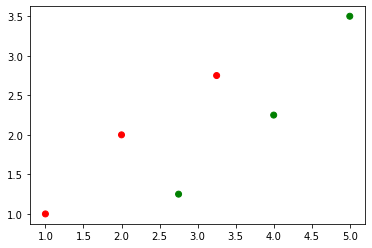

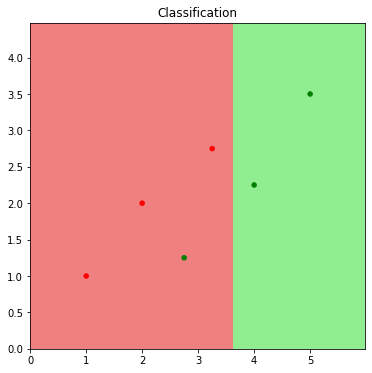

0.16666666666666663


In [62]:
import pandas as pd
d = pd.DataFrame({
    'X1': [1, 2, 2.75, 3.25, 4, 5],
    'X2': [1, 2, 1.25, 2.75, 2.25, 3.5],
    'Y': [1, 1, -1, 1, -1, -1]
})
X, Y = d[['X1', 'X2']], d['Y']
c = ["green" if label == -1 else "red" for label in Y]

plt.scatter(X["X1"], X["X2"], color=c)
plt.show()

ab = AdaBoostClassifier(n_estimators=1).fit(X, Y)
plot_decision_surface(ab, X, Y)
print(1-ab.score(X, Y))

# Exercise 3
AdaBoost vs ID3

Given the dataset below:
1. Plot the dataset using `pyplot`.
2. Compare the training error of the AdaBoost algorithm (using the usual decision stumps as weak learners) and the ID3 algorithm.
2. Compare the CVLOO error of the AdaBoost algorithm (using the usual decision stumps as weak learners) and the ID3 algorithm.

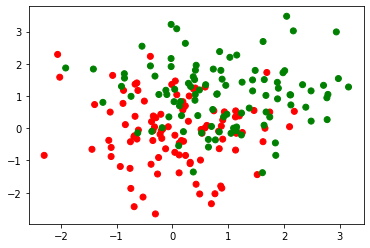

AdaBoost Training Error: 0.14
ID3 Training Error: 0.0


AdaBoost CVLOO Error: 0.345
ID3 CVLOO Error: 0.33


In [83]:
from scipy.stats import norm
from sklearn import tree
from sklearn.model_selection import LeaveOneOut
import pandas as pd
import numpy as np
x_red = norm.rvs(0, 1, 100, random_state=1)
y_red = norm.rvs(0, 1, 100, random_state=2)
x_green = norm.rvs(1, 1, 100, random_state=3)
y_green = norm.rvs(1, 1, 100, random_state=4)
d = pd.DataFrame({
    'X1': np.concatenate([x_red,x_green]),
    'X2': np.concatenate([y_red,y_green]),
    'Y': [1]*100+[0]*100
})
X, Y = d[['X1', 'X2']], d['Y']

plt.scatter(X['X1'], X['X2'], color=["green" if label == 0 else "red" for label in Y])
plt.show()

ab = AdaBoostClassifier().fit(X, Y)
print("AdaBoost Training Error:", 1-ab.score(X, Y))

dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X, Y)
print("ID3 Training Error:", 1-dt.score(X, Y))
print("\n")

loo = LeaveOneOut()
loo.get_n_splits(X)


total_ab_error = 0
total_dt_error = 0
for train_index, test_index in loo.split(X):
    ab = AdaBoostClassifier().fit(X.iloc[train_index], Y.iloc[train_index])
    total_ab_error += 1-ab.score(X.iloc[test_index], Y.iloc[test_index])
    dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X.iloc[train_index], Y.iloc[train_index])
    total_dt_error += 1-dt.score(X.iloc[test_index], Y.iloc[test_index])
    
print("AdaBoost CVLOO Error:", total_ab_error/len(X))
print("ID3 CVLOO Error:", total_dt_error/len(X))

## Exercise 4
Finding the optimum number of weak learners

For the dataset below:
1. plot the points using `pyplot.scatter`;
1. plot a line chart using `pyplot.plot` that shows the training error and the CVLOO error of AdaBoost using between 1 and 15 weak learners.
1. What is the best number of weak learners in this case?

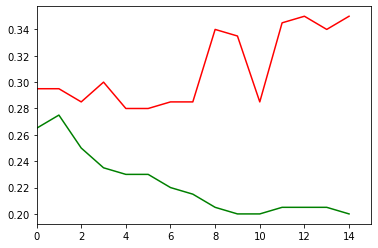

In [97]:
from scipy.stats import norm
import pandas as pd
import numpy as np
x_red = norm.rvs(0, 1, 100, random_state=1)
y_red = norm.rvs(0, 1, 100, random_state=2)
x_green = norm.rvs(1, 1, 100, random_state=3)
y_green = norm.rvs(1, 1, 100, random_state=4)
d = pd.DataFrame({
    'X1': np.concatenate([x_red,x_green]),
    'X2': np.concatenate([y_red,y_green]),
    'Y': [1]*100+[0]*100
})
X, Y = d[['X1', 'X2']], d['Y']
loo = LeaveOneOut()
loo.get_n_splits(X)

training_errors = list()
cvloo_errors = list()
for nr_learners in range(1, 16):
    ab = AdaBoostClassifier(n_estimators=nr_learners).fit(X, Y)
    training_errors.append(1-ab.score(X, Y))
    total_ab_error = 0
    for train_index, test_index in loo.split(X):
        ab = AdaBoostClassifier(n_estimators=nr_learners).fit(X.iloc[train_index], Y.iloc[train_index])
        total_ab_error += 1-ab.score(X.iloc[test_index], Y.iloc[test_index])
    cvloo_errors.append(total_ab_error/len(X))

plt.plot(training_errors, color="green")
plt.plot(cvloo_errors, color="red")
plt.xlim([0, 15])
# plt.ylim([0, 1])
plt.show()

# Exercise 5
Agglomerative clustering on a 2d dataset

Considering the points (-4, -2), (-3, -2), (-2, -2), (-1, -2), (1, -1), (1, 1), (2, 3), (3, 2), (3, 4), (4, 3):
1. create a scatter plot using `pyplot`;
1. create the dendrogram using `AgglomerativeClustering` with single-linkage and then color the scatter plot using the best 4 clusters;
1. create the dendrogram using `AgglomerativeClustering` with complete-linkage and then color the scatter plot using the best 4 clusters;
1. what is the difference in behaviour between the two types of linkage? What shapes do they tend to give to the clusters?

# Exercise 6
"Natural" clusters

Given the dataset {0, 4, 5, 20, 25, 39, 43, 44}:
1. find the natural clusters using agglomerative clusters with single-linkage and plot clusters using a scatter plot;
1. find the natural clusters using agglomerative clusters with average-linkage and plot clusters using a scatter plot.

# Exercise 7

For the following two datasets `d1` and `d2`:
1. plot the points using `pyplot` and highlight (by using different colours for the points) the 2 clusters found by agglomerative clustering using single linkage;
1. plot the points using `pyplot` and highlight (by using different colours for the points) the 2 clusters found by agglomerative clustering using average linkage.

In [97]:
from sklearn import datasets as ds

np.random.seed(0)
X1, _ = ds.make_circles(n_samples=1500, factor=.5,  noise=.05)
X2, _ = ds.make_blobs(n_samples=1500,
                      cluster_std=[1.0, 2.5, 0.5],
                      random_state=170)

d1 = pd.DataFrame(X1, columns=['X1', 'X2'])
d2 = pd.DataFrame(X2, columns=['X1', 'X2'])